# Practice Lab 2: Keras and MNIST

**This is a modified version of the original notebook by Francois Chollet.** 

## Objectives

By the end of this lab, you should be able to:
 - explain the role of train, validation, and test sets and understand why the tutorial is  only using train and test
 - explain the tensor (data) shapes of (28, 28), (60000, 28, 28), (784,), and (60000, 784); what they mean and where they come from
 - explain one-hot encoding of the label data 
 - sketch (on paper) the architecture/structure of the model being used 
 - calculate by hand how many parameters (weights and biases) the network is using  
 - understand the output of `model.summary()` and use to verify the parameter calculation done above
 - explain why this neural network has 10 output neurons
 - provide basic explanations for the terms *optimizer*, *loss*, and *metric* 
 - explain what an *epoch* is 
 - explain what is meant by *batch size* and how it is connected to model learning
 - explain the difference between training a network and testing a network
 - give a brief explanation of the softmax function and how it is being used

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this first example right away. Don't worry, that is perfectly fine. We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on. 

### Getting the data

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

### Understanding the data and data shapes

Let's have a look at the training data:

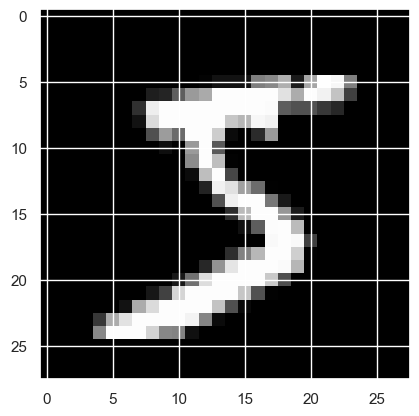

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.imshow(train_images[0], cmap='gray')

In [3]:
import numpy as np

with np.printoptions(linewidth=np.inf):
    print(train_images[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [4]:
train_labels[0]

5

In [5]:
train_images[0].shape  

(28, 28)

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels[:5] 

array([5, 0, 4, 1, 9], dtype=uint8)

Let's have a look at the test data:

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [12]:
train_images = train_images.astype('float32') / 255
train_images = train_images.reshape((60000, 28 * 28))

test_images = test_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))

### Reshaping an image for the network

The picture below shows the steps involved in converting a 10x10 pixel image into a 1 dimensional array that can be fed into a fully-connected neural network (assuming we do not scale the pixel values). 

<img src="images/Lab 1 - Pictures-2.jpg" width=600 align="center">

And the picture below should help you visualize what things look like when we consider more than a single sample in our data:

<img src="images/Lab 1 - Pictures-3.jpg" width=600 align="center">


### One-hot encoding label data

We also need to categorically encode the labels:

In [13]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<img src="images/Lab 1 - Pictures-5.jpg" width=600 align="center">

Our workflow will be as follow: first we will present our neural network with the training data: `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

## Build the network

Let's build our network!

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Input

network = Sequential([
    Input(shape=(28*28,)), 
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
    ])

The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes. See this [blog post](https://victorzhou.com/blog/softmax/) for more details on the softmax function. The following picture may help you see what is happening:

<img src="images/Lab 1 - Pictures-4.jpg" width=600 align="center">

## Network architecture and parameters
It is often helpful to review the architecture of the network and see how many parameters will need to be learned through the training process. To do this, Keras provides the `.summary()` function:

In [16]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the network
To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update its parameters (weights and biases) based on the data it sees and its loss function. This is like the *gradient descent* recipe for updating the network's parameters.
* Metrics: what to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

In [17]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

## Train the network

In [18]:
history = network.fit(train_images, train_labels, epochs = 5, batch_size=128, verbose = 1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8717 - loss: 0.4391
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9668 - loss: 0.1133
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.0695
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9852 - loss: 0.0500
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0365


In [19]:
history.history

{'accuracy': [0.9242166876792908,
  0.9687666893005371,
  0.9788166880607605,
  0.9848333597183228,
  0.9886166453361511],
 'loss': [0.26037225127220154,
  0.10652618110179901,
  0.0702173039317131,
  0.05136002227663994,
  0.03853268176317215]}

**epoch** 
  - one epoch is reached when all training examples have been sent through the network
  
**batch size**
  - the training data is not sent through the network one sample at time but in batches; this is another hyperparamter to be set. The weights and biases are updated after each batch is processed by the network. In this example the batch size was set to 128


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of around 0.98 (i.e. 98%) on the training data. 

## Check test accuracy

Now let's check that our model performs well on the test set too:

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.9722 - loss: 0.0866


In [21]:
print('test_acc:', test_acc)

test_acc: 0.9771999716758728



Our test set accuracy turns out to be around 98%, which is lower than the training set accuracy. 
This concludes our very first example -- you just saw how we could build and train a neural network to classify handwritten digits, in less than 20 lines of Python code. 

## Softmax output

**NOTE: The code cells in this section are not executable. Due to randomness, if you execute these cells then the numbers in my explanations will not match the output form the code.**

To get a better understanding of the `softmax` function in the output layer, we will make a prediction for a single test image.

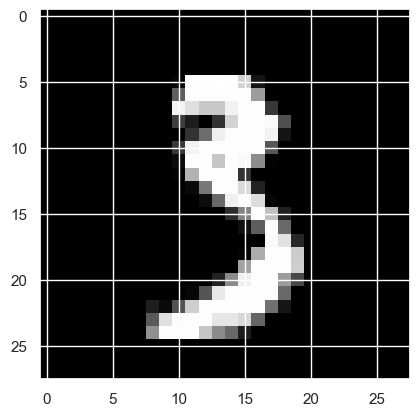

In [22]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

single_test_image = test_images[1953]
plt.imshow(single_test_image, cmap='gray')

Our original network is *too good* at making predictions so the output of the softmax function is usually an array of 0's and 1's. To see how the output represents how *confident* the network is about which digit an image is, we will train a new *bad* network, one that is not so good at predicting. 

In [23]:
train_images = train_images.astype('float32') / 255
train_images = train_images.reshape((60000, 28 * 28))

test_images = test_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

bad_network = Sequential([
    Input(shape=(28*28,)),
    Dense(1, activation='relu'),
    Dense(10, activation='softmax')
    ])

bad_network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

bad_history = bad_network.fit(train_images, train_labels, epochs=1, batch_size=128, verbose=1)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.1344 - loss: 2.1966


Now, we will pass our `single_test_image` through this network and look at its output.

In [24]:
probs = bad_network.predict(single_test_image.reshape((1, 28 * 28)))
probs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[0.0000000e+00, 3.2598135e-01, 2.1072951e-33, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.7984495e-19, 6.7401862e-01,
        1.4555620e-23, 6.6786499e-26]], dtype=float32)

Let us also note that the sum of these 10 outputs is equal to 1, as is the case for probabilities; that is, there are only 10 possible outcomes and so the sum of the probability of each happening should be 1 (within rounding error). (Consider flipping a fair coin. The probability of getting heads is 0.5 and the probability of getting tails is 0.5. Those are the only two outcomes possible, and their probabilities sum to 1.) 

In [25]:
import numpy as np

np.sum(probs)

1.0

We interpret the output of `probs` as follows: 
 - 0.10792217 is the probability that `single_test_image` is an image of a 0 (also index 0 of the output array)
 - 0.08251629 is the probability that `single_test_image` is an image of a 1 (also index 1 of the output array)
 - 0.06144017 is the probability that `single_test_image` is an image of a 2 (also index 2 of the output array)
 - etc. 
 
To make an actual prediction, the network will choose the index of the output with the highest probability. 

In [26]:
# import numpy as np

prediction = np.argmax(probs)
prediction

7

So, our network makes a prediction that `single_test_image` is an image of the digit 7 because that is the output with the highest probability; although, in this case, the network is not *very* confident. 

## Your turn

Rerunning the network means executing the following steps:
- Build the network
- Network architecure and parameters
- Compile the network
- Train the network
- Check test accuracy

**Each exercise will thus have all the necessary code to build, compile, fit, and test.**

## Starting Code

Begin with the following code for Exercises 1 to 5, that is, the code below is what you are being asked to modify in the first five exercises:

```
network = Sequential([
            Input(shape=(28*28,),
            Dense(512, activation='relu'),
            Dense(10, activation='softmax')
            ])

network.summary()

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
                
network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1)

test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)
```

Be sure to rename the `network` for each Exercise. 

### Exercise 1

- change the activation in the hidden layer to 'sigmoid'
- run the modified code
- record the results in the **Aggregated Results** section below

In [27]:
network = Sequential([
    Input(shape = (28*28,)),
    Dense(512, activation = 'sigmoid'),
    Dense(10, activation = 'softmax')
])

network.summary()

network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

network.fit(train_images, train_labels, epochs = 5, batch_size = 128, verbose = 1)

test_loss, test_acc = network.evaluate(test_images, test_labels)

print()
print("test_acc : ", test_acc)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8124 - loss: 0.7209
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9199 - loss: 0.2775
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9335 - loss: 0.2309
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9459 - loss: 0.1821
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9558 - loss: 0.1521
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9499 - loss: 0.1596

test_acc :  0.9577000141143799


### Exercise 2

- change the batch size to 32
- run the modified code
- record the results in the **Aggregated Results** section below

In [28]:
network = Sequential([
    Input(shape = (28*28,)),
    Dense(512, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

network.summary()

network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

network.fit(train_images, train_labels, epochs = 5, batch_size = 32, verbose = 1)

test_loss, test_acc = network.evaluate(test_images, test_labels)

print()
print("test_acc : ", test_acc)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9039 - loss: 0.3273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9724 - loss: 0.0896
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0589
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9877 - loss: 0.0424
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9903 - loss: 0.0348
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.9735 - loss: 0.1079

test_acc :  0.9761999845504761


### Exercise 3 

- change the number of epochs to 10
- run the modified code
- record the results in the **Aggregated Results** section below

In [29]:
network = Sequential([
    Input(shape = (28*28,)),
    Dense(512, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

network.summary()

network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

network.fit(train_images, train_labels, epochs = 10, batch_size = 128, verbose = 1)

test_loss, test_acc = network.evaluate(test_images, test_labels)

print()
print("test_acc : ", test_acc)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8700 - loss: 0.4528
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9667 - loss: 0.1157
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9793 - loss: 0.0713
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0506
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9897 - loss: 0.0344
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0283
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0212
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9953 - loss: 0.0156
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9969 - loss: 0.0109
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9981 - loss: 0.0078
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.9796 - loss: 0.0759

test_acc :  0.9829000234603882


### Exercise 4

- change the number of neurons in the hidden layer to 128
- run the modified code
- record the results in the **Aggregated Results** section below

In [30]:
network = Sequential([
    Input(shape = (28*28,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

network.summary()

network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

network.fit(train_images, train_labels, epochs = 5, batch_size = 128, verbose = 1)

test_loss, test_acc = network.evaluate(test_images, test_labels)

print()
print("test_acc : ", test_acc)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8558 - loss: 0.5438
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9492 - loss: 0.1753
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9650 - loss: 0.1213
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9738 - loss: 0.0917
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9800 - loss: 0.0722
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.9703 - loss: 0.0984

test_acc :  0.9739000201225281


### Exercise 5

- add a second hidden layer of 128 neurons (note that `input_shape` does not need to be set for a second *Dense* layer)
- run the modified code
- record the results in the **Aggregated Results** section below

In [31]:
network = Sequential([
    Input(shape = (28*28,)),
    Dense(512, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

network.summary()

network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

network.fit(train_images, train_labels, epochs = 5, batch_size = 128, verbose = 1)

test_loss, test_acc = network.evaluate(test_images, test_labels)

print()
print("test_acc : ", test_acc)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8681 - loss: 0.4318
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9713 - loss: 0.0973
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9817 - loss: 0.0597
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9876 - loss: 0.0393
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9914 - loss: 0.0290
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.9783 - loss: 0.0713

test_acc :  0.9822999835014343


### Exercise 6

There is a good chance that the network from the previous exercise is overfitting. One way to manage overfitting in a network is to add a **dropout** layer. A dropout layer will randomly "turn off" (or *drop*) a fraction of the neurons in a layer. This makes it harder for the network to 'memorize' the training data. 

- start with the code from Exercise 5
- add a dropout layer after the first hidden layer (see the [keras documentation](https://keras.io/layers/core/))
- run the modified code
- record the results in the **Aggregated Results** section below

In [32]:
from keras.layers import Dropout

network = Sequential([
    Input(shape = (28*28,)),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

network.summary()

network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

network.fit(train_images, train_labels, epochs = 5, batch_size = 128, verbose = 1)

test_loss, test_acc = network.evaluate(test_images, test_labels)

print()
print("test_acc : ", test_acc)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8402 - loss: 0.5222
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9527 - loss: 0.1551
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9650 - loss: 0.1183
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9708 - loss: 0.0971
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9758 - loss: 0.0781
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9778 - loss: 0.0786

test_acc :  0.9812999963760376


## Aggregated Results

Record the results for Exercises 1 to 6 in the table below. It has been partially filled out for Exercise 1.  

|Exercise | Activation Function | No. Layers (excl. input) | No. Neurons/Layer | Batch Size | No. Epochs | Dropout (Y/N) | No. Parameters | Training Accuracy | Test Accuracy |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | sigmoid | 2 | 512/10 | 128 | 5 | N | 407,050 | 0.9567 | 0.9578 |
| 2 | relu | 2 | 512/10 | 32 | 5 | N | 407,050 | 0.9905 | 0.9805 |
| 3 | relu | 2 | 512/10 | 128 | 10 | N | 407,050 | 0.9982 | 0.9828 |
| 4 | relu | 2 | 128/10 | 128 | 5 | N | 101,770 | 0.9796 | 0.9717 |
| 5 | relu | 3 | 512/128/10 | 128 | 5 | N | 468,874 | 0.9907 | 0.9814 |
| 6 | relu | 4 | 512/512/128/10 | 128 | 5 | Y | 468,874 | 0.9731 | 0.9775 |

## Exercise 7 - CHALLENGE!

State of the art accuracy for the MNIST dataset is 99.84%. 

**How close can you get to this accuracy?**

- Create a new fully-connected network. You can find information in the [keras documentation](https://keras.io/). Things to try:
     - number of layers
     - number of neurons per layer
     - batch size
     - learning rate
     - activation functions
     - weight initializations
     - different optimizers
     - dropout layers
- This network should have at least 3 characteristics that are different from every other network you created in this lab 


In [56]:
from keras import initializers
from keras.optimizers import Adam

network = Sequential([
    Input(shape = (28*28,)),
    Dense(512, activation = 'leaky_relu', kernel_initializer = initializers.RandomNormal(stddev = 0.01), bias_initializer = initializers.Ones()),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

network.summary()

network.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model = network.fit(train_images, train_labels, epochs = 16, batch_size = 32, verbose = 1, validation_data = (test_images, test_labels))

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 583,946 (2.23 MB)

 Trainable params: 583,946 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8567 - loss: 0.4415 - val_accuracy: 0.9551 - val_loss: 0.1448
Epoch 2/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9612 - loss: 0.1267 - val_accuracy: 0.9575 - val_loss: 0.1376
Epoch 3/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9720 - loss: 0.0885 - val_accuracy: 0.9719 - val_loss: 0.0928
Epoch 4/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9768 - loss: 0.0745 - val_accuracy: 0.9684 - val_loss: 0.1073
Epoch 5/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9809 - loss: 0.0608 - val_accuracy: 0.9730 - val_loss: 0.1032
Epoch 6/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9839 - loss: 0.0516 - val_accuracy: 0.9744 - val_loss: 0.0838
Epoch 7/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9858 - loss: 0.0450 - val_accuracy: 0.9746 - val_loss: 0.0925
Epoch 8/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9864 - loss: 0.0449 - 

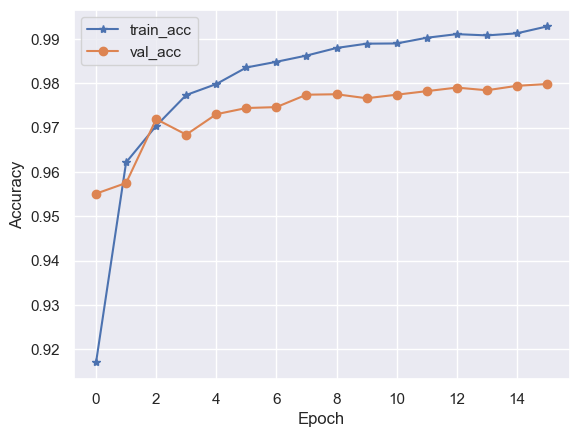

In [57]:
plt.figure(figsize = (15,8))
plt.plot(model.history['accuracy'], marker = '*')
plt.plot(model.history['val_accuracy'], marker = 'o')
plt.legend(["train_acc", "val_acc"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

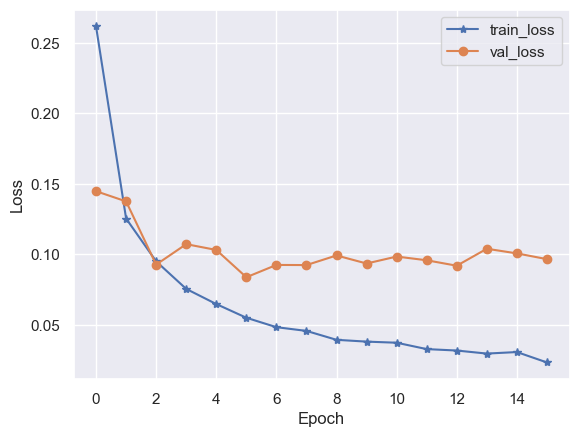

In [58]:
plt.figure(figsize = (15,8))
plt.plot(model.history['loss'], marker = '*')
plt.plot(model.history['val_loss'], marker = 'o')
plt.legend(["train_loss", "val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [59]:
from keras import initializers
from keras.optimizers import Adam

network = Sequential([
    Input(shape = (28*28,)),
    Dense(512, activation = 'leaky_relu', kernel_initializer = initializers.RandomNormal(stddev = 0.01), bias_initializer = initializers.Ones()),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

network.summary()

network.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model = network.fit(train_images, train_labels, epochs = 16, batch_size = 16, verbose = 1, validation_data = (test_images, test_labels))

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 583,946 (2.23 MB)

 Trainable params: 583,946 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8627 - loss: 0.4299 - val_accuracy: 0.9490 - val_loss: 0.1644
Epoch 2/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9589 - loss: 0.1362 - val_accuracy: 0.9574 - val_loss: 0.1428
Epoch 3/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9691 - loss: 0.1039 - val_accuracy: 0.9668 - val_loss: 0.1253
Epoch 4/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9758 - loss: 0.0832 - val_accuracy: 0.9723 - val_loss: 0.1004
Epoch 5/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9783 - loss: 0.0728 - val_accuracy: 0.9709 - val_loss: 0.1097
Epoch 6/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9820 - loss: 0.0611 - val_accuracy: 0.9723 - val_loss: 0.1143
Epoch 7/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9832 - loss: 0.0561 - val_accuracy: 0.9706 - val_loss: 0.1148
Epoch 8/16
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9847 - loss: 0

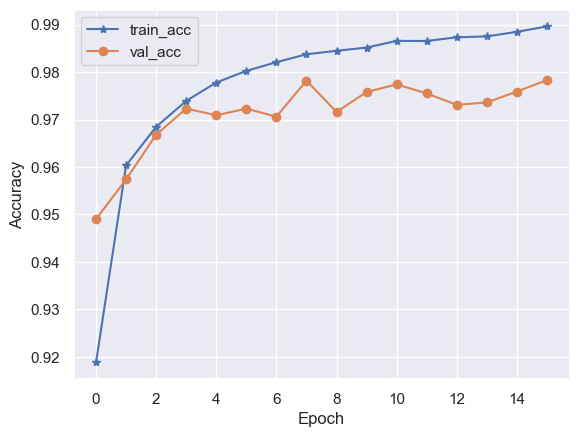

In [60]:
plt.figure(figsize = (15,8))
plt.plot(model.history['accuracy'], marker = '*')
plt.plot(model.history['val_accuracy'], marker = 'o')
plt.legend(["train_acc", "val_acc"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

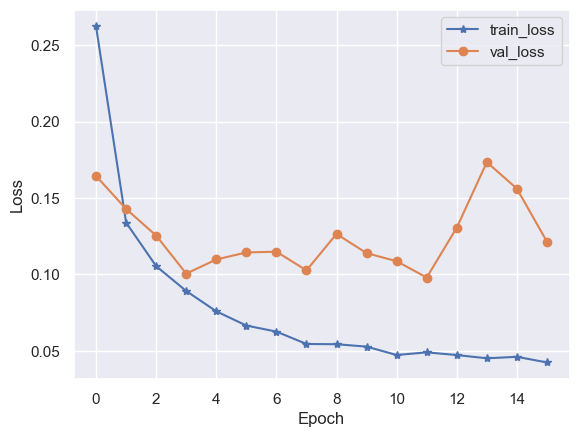

In [61]:
plt.figure(figsize = (15,8))
plt.plot(model.history['loss'], marker = '*')
plt.plot(model.history['val_loss'], marker = 'o')
plt.legend(["train_loss", "val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [65]:
from keras import initializers
from keras.optimizers import Adam

network = Sequential([
    Input(shape = (28*28,)),
    Dense(512, activation = 'leaky_relu', kernel_initializer = initializers.RandomNormal(stddev = 0.01), bias_initializer = initializers.Ones()),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

network.summary()

network.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model = network.fit(train_images, train_labels, epochs = 32, batch_size = 32, verbose = 1, validation_data = (test_images, test_labels))

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 583,946 (2.23 MB)

 Trainable params: 583,946 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8563 - loss: 0.4487 - val_accuracy: 0.9550 - val_loss: 0.1495
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9599 - loss: 0.1295 - val_accuracy: 0.9662 - val_loss: 0.1091
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9711 - loss: 0.0923 - val_accuracy: 0.9637 - val_loss: 0.1191
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9780 - loss: 0.0700 - val_accuracy: 0.9723 - val_loss: 0.0949
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9813 - loss: 0.0588 - val_accuracy: 0.9736 - val_loss: 0.0960
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9846 - loss: 0.0481 - val_accuracy: 0.9752 - val_loss: 0.0885
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9855 - loss: 0.0453 - val_accuracy: 0.9690 - val_loss: 0.1070
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9875 - loss: 0.0406 - 

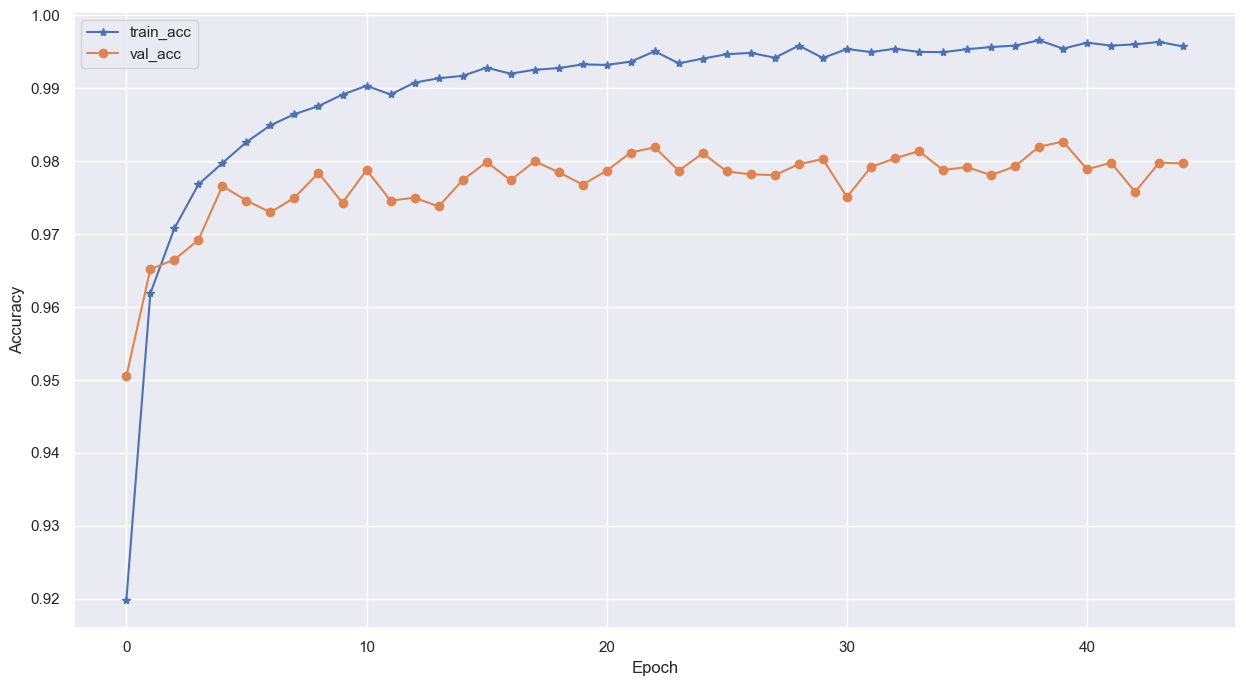

In [77]:
plt.figure(figsize = (15,8))
plt.plot(model.history['accuracy'], marker = '*')
plt.plot(model.history['val_accuracy'], marker = 'o')
plt.legend(["train_acc", "val_acc"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

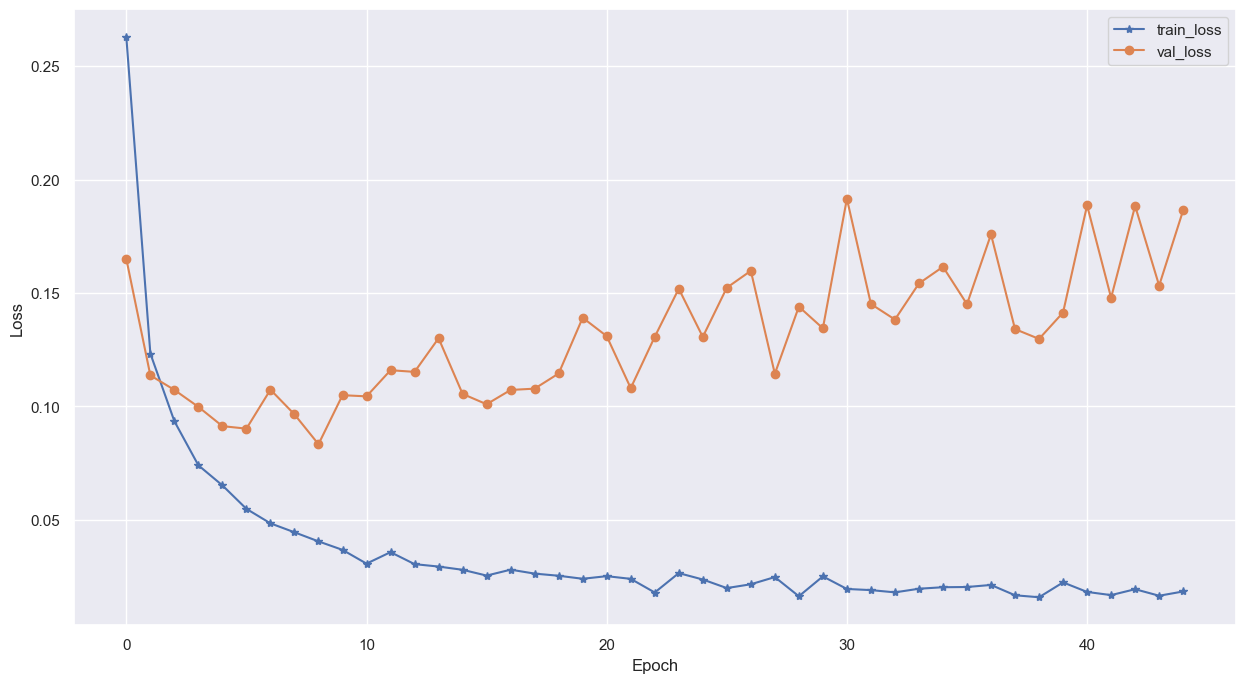

In [78]:
plt.figure(figsize = (15,8))
plt.plot(model.history['loss'], marker = '*')
plt.plot(model.history['val_loss'], marker = 'o')
plt.legend(["train_loss", "val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()